In [ ]:
## Uncomment and run this cell to install the packages
# !pip install pandas numpy statsmodels

In [ ]:
from dataidea.packages import *

This notebook has been modified to use the Nobel Price Laureates Dataset which you can download from [opendatasoft](https://public.opendatasoft.com/explore/dataset/nobel-prize-laureates/export/?disjunctive.category)

## Descriptive Statistics and Summary Metrics

Descriptive statistics is a branch of statistics that deals with the presentation and summary of data in a meaningful and informative way. Its primary goal is to describe and summarize the main features of a dataset. 

Commonly used measures in descriptive statistics include:

1. Measures of central tendency: These describe the center or average of a dataset and include metrics like mean, median, and mode.

2. Measures of variability: These indicate the spread or dispersion of the data and include metrics like range, variance, and standard deviation.

3. Measures of distribution shape: These describe the distribution of data points and include metrics like skewness and kurtosis.

4. Measures of association: These quantify the relationship between variables and include correlation coefficients.

Descriptive statistics provide simple summaries about the sample and the observations that have been made.

#### 1. **Measures of central tendency ie Mean, Median, Mode**:
**The Center of the Data:**

The center of the data is where most of the values are concentrated.

   - Mean: It is the average value of a dataset calculated by summing all values(numerical) and dividing by the total count.
   - Median: It is the middle value of a dataset when arranged in ascending order. If there is an even number of observations, the median is the average of the two middle values.
   - Mode: It is the value that appears most frequently in a dataset.


In [ ]:
# load the dataset (modify the path to point to your copy of the dataset)
data = pd.read_csv('../assets/nobel_prize_year.csv')
data.sample(n=5)

,Year,Gender,Category,birth_year,age
86,1971,male,Medicine,1915,56
524,1978,male,Medicine,1928,50
840,1929,male,Medicine,1858,71
214,2018,male,Chemistry,1951,67
492,2012,male,Economics,1951,61


In [ ]:
# get the age column data (optional: convert to numpy array)
age = np.array(data.age)

In [ ]:
# Let's get the values that describe the center of the ages data 
mean_value = np.mean(age)
median_value = np.median(age)
mode_value = sp.stats.mode(age)[0]

# Let's print the values
print("Mean:", mean_value)
print("Median:", median_value)
print("Mode:", mode_value)

Mean: 60.1244769874477
Median: 60.0
Mode: 56


**Homework:**
- Other ways to find mode (ie using pandas and numpy)


#### 2. **Measures of variability**
**The Variation of the Data:**

The variation of the data is how spread out the data are around the center.

   **a) Variance and Standard Deviation**:
   - Variance: It measures the spread of the data points around the mean.
   - Standard Deviation: It is the square root of the variance, providing a measure of the average distance between each data point and the mean.

>In summary, variance provides a measure of dispersion in squared units, while standard deviation provides a measure of dispersion in the original units of the data


In [ ]:
# how to implement the variance and standard deviation using numpy
variance_value = np.var(age)
std_deviation_value = np.std(age)

print("Variance:", variance_value)
print("Standard Deviation:", std_deviation_value)

Variance: 163.1424552703909
Standard Deviation: 12.772723095346228


>Smaller variances and standard deviation values mean that the data has values similar to each other and closer to the mean and the vice versa is true

In [ ]:
std_second = 2 * std_deviation_value  # Multiply by 2 for the second standard deviation
std_third = 3 * std_deviation_value   # Multiply by 3 for the third standard deviation

print("First Standard Deviation:", std_deviation_value)
print("Second Standard Deviation:", std_second)
print("Third Standard Deviation:", std_third)

# empirical rule, also known as the 68-95-99.7 rule, 

First Standard Deviation: 12.772723095346228
Second Standard Deviation: 25.545446190692456
Third Standard Deviation: 38.31816928603868


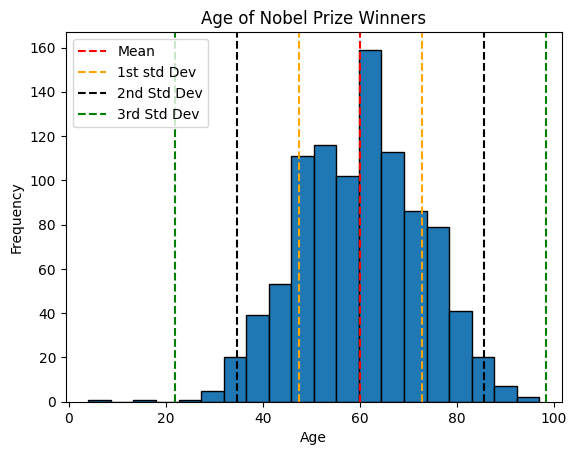

In [ ]:
plt.hist(x=age, bins=20, edgecolor='black')
# add standard deviation lines
plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
plt.axvline(mean_value+std_deviation_value, color='orange', linestyle='--', label='1st std Dev')
plt.axvline(mean_value-std_deviation_value, color='orange', linestyle='--')
plt.axvline(mean_value+std_second, color='black', linestyle='--', label='2nd Std Dev')
plt.axvline(mean_value-std_second, color='black', linestyle='--')
plt.axvline(mean_value+std_third, color='green', linestyle='--', label='3rd Std Dev')
plt.axvline(mean_value-std_third, color='green', linestyle='--')
plt.title('Age of Nobel Prize Winners')
plt.ylabel('Frequency')
plt.xlabel('Age')
# Adjust the position of the legend
plt.legend(loc='upper left')

plt.show()

**The rule to consider:**

The empirical rule, also known as the 68-95-99.7 rule, describes the distribution of data in a normal distribution. According to this rule:

1. Approximately 68% of the data falls within one standard deviation of the mean.
2. Approximately 95% of the data falls within two standard deviations of the mean.
3. Approximately 99.7% of the data falls within three standard deviations of the mean.


 b) **Range and Interquartile Range (IQR)**:
   - Range: It is the difference between the maximum and minimum values in a dataset. It is simplest measure of variation
   - Interquartile Range (IQR): It is the range between the first quartile (25th percentile) and the third quartile (75th percentile) of the dataset.

>In summary, while the range gives an overview of the entire spread of the data from lowest to highest, the interquartile range focuses s`pecifically on the spread of the middle portion of the data, making it more robust against outliers.


In [ ]:
# One way to obtain range
min_age = min(age)
max_age = max(age)
age_range = max_age - min_age
print('Range:', age_range)

Range: 93


In [ ]:
# Calculating the range using numpy
range_value = np.ptp(age)

print("Range:", range_value)

Range: 93


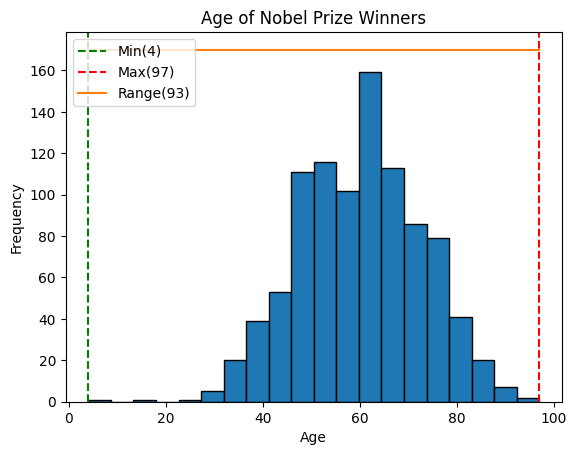

In [ ]:
plt.hist(x=age, bins=20, edgecolor='black')
# add standard deviation lines
plt.axvline(min_age, color='green', linestyle='--', label=f'Min({min_age})')
plt.axvline(max_age, color='red', linestyle='--', label=f'Max({max_age})')
plt.plot([min_age, max_age], [170, 170], label=f'Range({age_range})')
# labels
plt.title('Age of Nobel Prize Winners')
plt.ylabel('Frequency')
plt.xlabel('Age')
# Adjust the position of the legend
plt.legend(loc='upper left')
plt.show()

**Quartiles:**

**Calculating Quartiles**

The quartiles (Q0,Q1,Q2,Q3,Q4) are the values that separate each quarter.

Between Q0 and Q1 are the 25% lowest values in the data. Between Q1 and Q2 are the next 25%. And so on.

- Q0 is the smallest value in the data.
- Q1 is the value separating the first quarter from the second quarter of the data.
- Q2 is the middle value (median), separating the bottom from the top half.
- Q3 is the value separating the third quarter from the fourth quarter
- Q4 is the largest value in the data.

In [ ]:
# Calculate the quartile
quartiles = np.quantile(a=age, q=[0, 0.25, 0.5, 0.75, 1])

print(quartiles)

[ 4. 51. 60. 69. 97.]


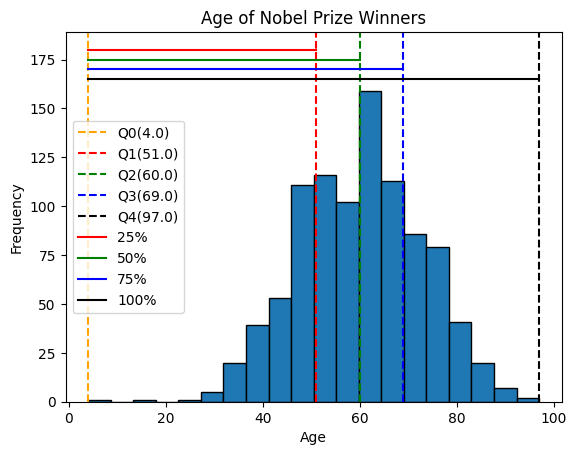

In [ ]:
plt.hist(x=age, bins=20, edgecolor='black')
# add standard deviation lines
plt.axvline(quartiles[0], color='orange', linestyle='--', label=f'Q0({quartiles[0]})')
plt.axvline(quartiles[1], color='red', linestyle='--', label=f'Q1({quartiles[1]})')
plt.axvline(quartiles[2], color='green', linestyle='--', label=f'Q2({quartiles[2]})')
plt.axvline(quartiles[3], color='blue', linestyle='--', label=f'Q3({quartiles[3]})')
plt.axvline(quartiles[4], color='black', linestyle='--', label=f'Q4({quartiles[4]})')
plt.plot([quartiles[0], quartiles[1]], [180, 180], color='red', label=f'25%')
plt.plot([quartiles[0], quartiles[2]], [175, 175], color='green', label=f'50%')
plt.plot([quartiles[0], quartiles[3]], [170, 170], color='blue', label=f'75%')
plt.plot([quartiles[0], quartiles[4]], [165, 165], color='black', label=f'100%')
# labels
plt.title('Age of Nobel Prize Winners')
plt.ylabel('Frequency')
plt.xlabel('Age')
# Adjust the position of the legend
plt.legend(loc='center left')
plt.show()

**Percentiles**
Percentiles are values that separate the data into 100 equal parts.

For example, The 95th percentile separates the lowest 95% of the values from the top 5%

- The 25th percentile (P25%) is the same as the first quartile (Q1).

- The 50th percentile (P50%) is the same as the second quartile (Q2) and the median.

- The 75th percentile (P75%) is the same as the third quartile (Q3)

**Calculating Percentiles with Python**

In [ ]:
first_quartile = np.percentile(age, 25) # 25th percentile
middle_percentile = np.percentile(age, 50)
third_quartile = np.percentile(age, 75) # 75th percentile

print('first_quartile: ', first_quartile)
print('middle_percentile: ', middle_percentile)  
print('third_quartile', third_quartile)

first_quartile:  51.0
middle_percentile:  60.0
third_quartile 69.0


Note also that we can be able to use the `np.quantile()` method  to calculate the percentiles which makes logical sense as all the values mark a fraction(percentage) of the data

In [ ]:
percentiles = np.quantile(a=age, q=[0.25, 0.50, 0.75])
print('Percentiles:', percentiles)

Percentiles: [51. 60. 69.]


Now we can be able to obtain the interquartile range as the difference between the third and first quartiles as predefined.

In [ ]:
# obtain the interquartile
iqr_value = third_quartile - first_quartile

print('Interquartile range: ', iqr_value)

Interquartile range:  18.0


Note: *Quartiles and percentiles are both types of quantiles*

#### 3. **Measures of distribution shape ie Skewness and Kurtosis**:
**The shape of the Data:**

The shape of the data refers to how the data are bounded on either side of the center.
   - Skewness: It measures the asymmetry of the distribution.
   - Kurtosis: It measures the peakedness or flatness of the distribution.

>In simple terms, skewness tells you if your data is leaning more to one side or the other, while kurtosis tells you if your data has heavy or light tails and how sharply it peaks.

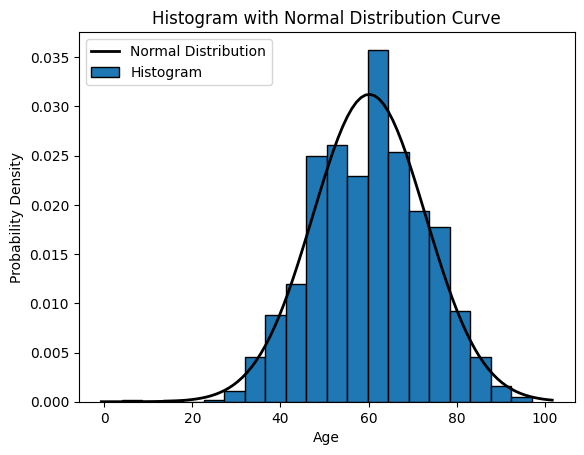

In [ ]:
# Plot the histogram
plt.hist(x=age, bins=20, density=True, edgecolor='black')  # Set density=True for normalized histogram

# Create a normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = sp.stats.norm.pdf(x, mean_value, std_deviation_value)
plt.plot(x, p, 'k', linewidth=2)  # 'k' indicates black color, you can change it to any color

# Labels and legend
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.title('Histogram with Normal Distribution Curve')
plt.legend(['Normal Distribution', 'Histogram'])

plt.show()

In [ ]:
skewness_value = sp.stats.skew(age)

print("Skewness:", skewness_value)

Skewness: -0.10796649932566309


**How to interpret Skewness:**

- Positive skewness (> 0) indicates that the tail on the right side of the distribution is longer or fatter than the left side (right skewed). 
- Negative skewness (< 0) indicates that the tail on the left side of the distribution is longer or fatter than the right side (left skewed). 

In [ ]:
kurtosis_value = sp.stats.kurtosis(age)

print("Kurtosis:", kurtosis_value)

Kurtosis: -0.09094568849488294


**How to interpret Kurtosis:**

- A kurtosis of 3 indicates the normal distribution (mesokurtic), also known as Gaussian distribution.
- Positive kurtosis (> 3) indicates a distribution with heavier tails and a sharper peak than the normal distribution. This is called leptokurtic.
- Negative kurtosis (< 3) indicates a distribution with lighter tails and a flatter peak than the normal distribution. This is called platykurtic.

#### 4.**Measures of association**

a) **Correlation**

- Correlation measures the relationship between two numerical variables.

**Correlation Matrix**

- A correlation matrix is simply a table showing the correlation coefficients between variables

**Correlation Matrix in Python**

We can use the `corrcoef()` function in Python to create a correlation matrix.

In [ ]:
# Generate example data
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 6, 8, 10])

correlation_matrix = np.corrcoef(x, y)
print(correlation_matrix)

[[1. 1.]
 [1. 1.]]


**Correlation Coefficient**:
   - The correlation coefficient measures the strength and direction of the linear relationship between two continuous variables.
   - It ranges from -1 to 1, where:
     - 1 indicates a perfect positive linear relationship,
     - -1 indicates a perfect negative linear relationship,
     - 0 indicates no linear relationship.

In [ ]:
# Calculate correlation coefficient
correlation = np.corrcoef(x, y)[0, 1]
print("Correlation Coefficient:", correlation)

Correlation Coefficient: 0.9999999999999999


**Correlation vs Causality:**

Correlation measures the numerical relationship between two varaibles

A high correlation coefficient (close to 1), does not mean that we can for sure conclude an actual relationship between two variables.

A classic example:

- During the summer, the sale of ice cream at a beach increases
- Simultaneously, drowning accidents also increase as well
  
Does this mean that increase of ice cream sale is a direct cause of increased drowning accidents?

**Measures of Association for Categorical Variables**

b) **Contingency Tables and Chi-square Test for Independence**:
   - Contingency tables are used to summarize the relationship between two categorical variables by counting the frequency of observations for each combination of categories.
   - Chi-square test for independence determines whether there is a significant association between the two categorical variables.

In [ ]:
# Pick out on the Gender and Category from the dataset
# We drop all the missing values just for demonstration purposes
demo_data = data[data.Gender != 'org'][['Gender', 'Category']].dropna()

In [ ]:
# Obtain the cross tabulation of Gender and Category
# The cross tabulation is also known as the contingency table
gender_category_tab = pd.crosstab(demo_data.Gender, demo_data.Category)

In [ ]:
# Let's have a look at the outcome
gender_category_tab

Category,Chemistry,Economics,Literature,Medicine,Peace,Physics
Gender,,,,,,
female,8,3,17,13,19,5
male,186,90,103,214,92,220


In [ ]:
chi2_stat, p_value, dof, expected = sp.stats.chi2_contingency(gender_category_tab)
print('Chi-square Statistic:', round(chi2_stat, 3))
print('p-value:', round(p_value, 9))
print('Degrees of freedom (dof):', dof)
# print('Expected:', expected)

Chi-square Statistic: 41.382
p-value: 7.9e-08
Degrees of freedom (dof): 5


**Interpretation of Chi2 Test Results:**

- The Chi-square statistic measures the difference between the observed frequencies in the contingency table and the frequencies that would be expected if the variables were independent.
- The p-value is the probability of obtaining a Chi-square statistic as extreme as, or more extreme than, the one observed in the sample, assuming that the null hypothesis is true (i.e., assuming that there is no association between the variables).
- A low p-value indicates strong evidence against the null hypothesis, suggesting that there is a significant association between the variables.
- A high p-value indicates weak evidence against the null hypothesis, suggesting that there is no significant association between the variables.

c. **Measures of Association for Categorical Variables**:
   - Measures like Cramer's V or phi coefficient quantify the strength of association between two categorical variables.
   - These measures are based on chi-square statistics and the dimensions of the contingency table.

**Cramer's V formula:**

<img src="../assets/cramers_v.png" style="background: #67FFF0; width: 100%;"/>

In [ ]:
def cramersV(contingency_table):
    
    chi2_statistic = sp.stats.chi2_contingency(contingency_table)[0]
    total_observations = gender_category_tab.sum().sum()
    phi2 = chi2_statistic / total_observations
    rows, columns = gender_category_tab.shape
    
    return np.sqrt(phi2/ min(rows-1, columns-1))

In [ ]:
def cramersVCorrected(contingency_table):
    
    chi2_statistic = sp.stats.chi2_contingency(contingency_table)[0]
    total_observations = gender_category_tab.sum().sum()
    phi2 = chi2_statistic / total_observations
    rows, columns = gender_category_tab.shape
    phi2_corrected = max(0, phi2 - ((columns-1)*(rows-1))/(total_observations-1))
    rows_corrected = rows - ((rows-1)**2)/(total_observations-1)
    columns_corrected = columns - ((columns-1)**2)/(total_observations-1)
    
    return np.sqrt(phi2_corrected / min((columns_corrected-1), (rows_corrected-1)))

In [ ]:
cramersV(gender_category_tab)

0.2065471240964684

In [ ]:
cramersVCorrected(gender_category_tab)

0.19375370250760823

Cramer's V is measure of association between two categorical variables. It ranges from 0 to 1 where: 

- 0 indicates no association between the variables
- 1 indicates a perfect association between the variables

Here's an interpretation of the Cramer's V:

- Small effect: Around 0.1
- Medium effect: Around 0.3
- Large effect: Around 0.5 or greater

#### Frequency Tables
Frequency means the number of times a value appears in the data. A table can quickly show us how many times each value appears. If the data has many different values, it is easier to use intervals of values to present them in a table.

Here's the age of the 934 Nobel Prize winners up until the year 2020. IN the table, each row is an age interval of 10 years

Age Interval | Frequency
-------------|-----------
10-19 |	1
20-29 |	2
30-39 |	48
40-49 |	158
50-59 |	236
60-69 |	262
70-79 |	174
80-89 |	50
90-99 |	3

**Note:** *The intervals for the values are also called bin*